In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%pip install koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [30]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [3]:
# 연령대코드(5세 단위)를 "연령대"로 매핑
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

df['연령대'] = df['연령대코드(5세단위)'].map(age_code)
descriptive_stats = df.groupby('연령대')['허리둘레'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


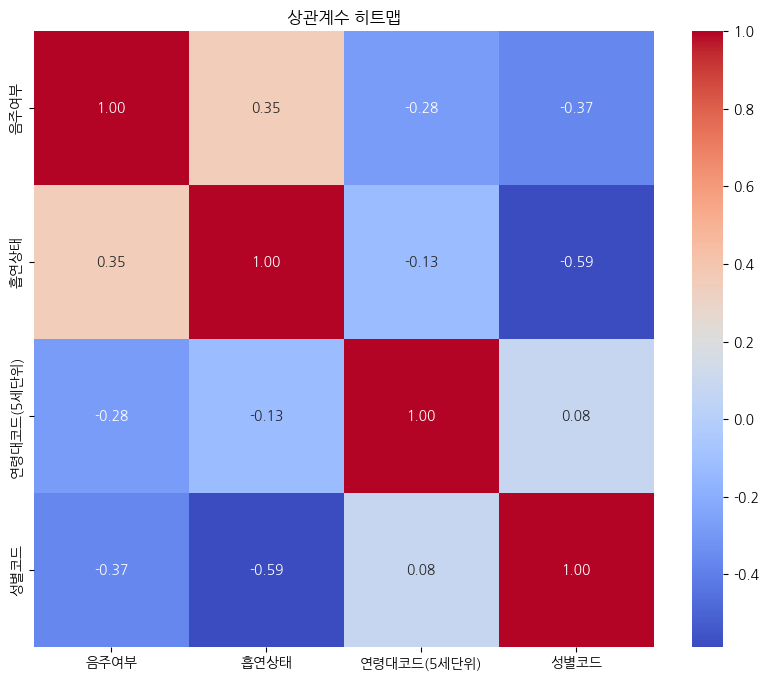

In [4]:
# 필요한 열만 선택
selected_columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
selected_df = df[selected_columns]
correlation_matrix = selected_df.corr()
# Seaborn을 사용하여 상관계수 히트맵 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관계수 히트맵")
plt.show()


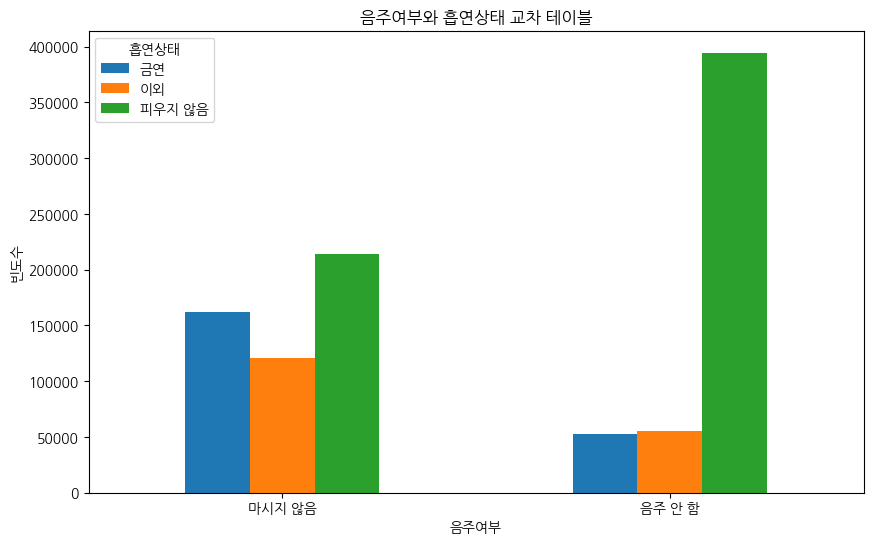

In [5]:
# 딕셔너리를 사용하여 숫자 값을 문자로 변경
alcohol_dict = {0: '음주 안 함', 1: '마시지 않음', 2: '마심'}
smoking_dict = {1: '피우지 않음', 2: '이외', 3: '금연', 4: '피웠으나 끊은지 6개월 미만', 5: '피운지 6개월 이상'}

df['음주여부'] = df['음주여부'].map(alcohol_dict)
df['흡연상태'] = df['흡연상태'].map(smoking_dict)
# 교차 테이블 생성
cross_table = pd.crosstab(df['음주여부'], df['흡연상태'])

# 시각화
cross_table.plot(kind='bar', figsize=(10, 6))
plt.title("음주여부와 흡연상태 교차 테이블")
plt.xlabel("음주여부")
plt.ylabel("빈도수")
plt.xticks(rotation=0)
plt.legend(title='흡연상태')
plt.show()


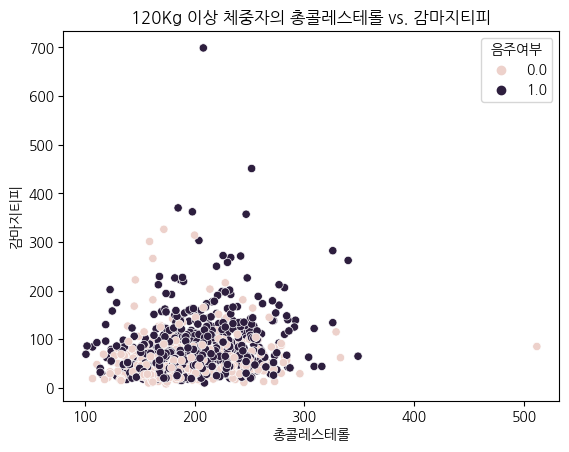

In [12]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")

# 체중이 120Kg 이상인 데이터 필터링
over_120kg = df[df['체중(5Kg 단위)'] >= 120]

# 음주 여부에 따라 산점도 그리기
sns.scatterplot(x='총콜레스테롤', y='감마지티피', hue='음주여부', data=over_120kg)

# 그래프 제목과 축 레이블 설정
plt.title('120Kg 이상 체중자의 총콜레스테롤 vs. 감마지티피')
plt.xlabel('총콜레스테롤')
plt.ylabel('감마지티피')

# 그래프 출력
plt.show()


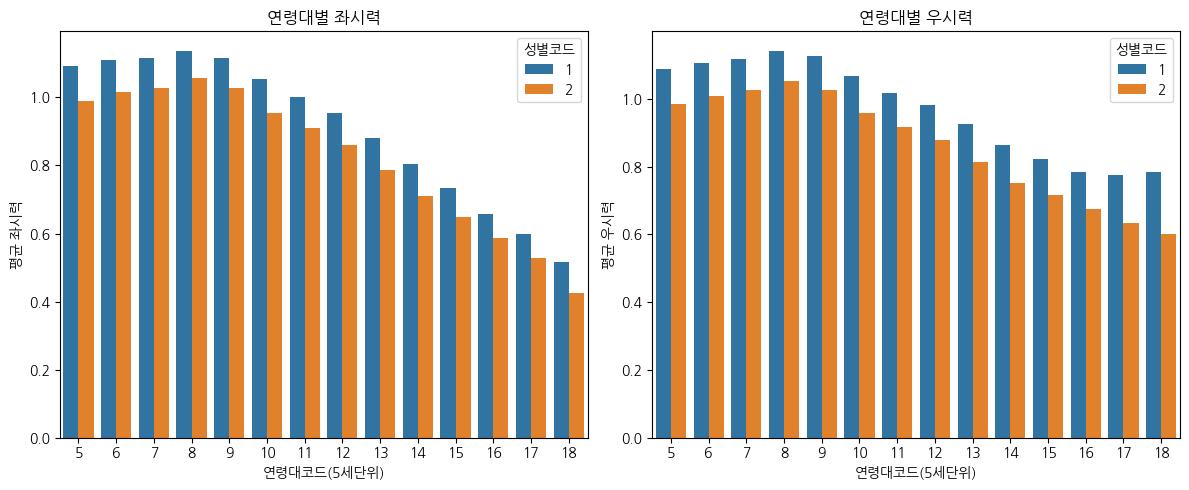

In [26]:
# 실명 데이터 (시력이 9.9인 데이터) 제외
filtered_df = df[df['시력(좌)'] != 9.9]

# 연령대, 성별에 따른 평균 좌우 시력 계산
mean_eye_sight = filtered_df.groupby(['연령대코드(5세단위)', '성별코드'])[['시력(좌)', '시력(우)']].mean().reset_index()

# 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 왼쪽 subplot: 연령대에 따른 좌시력 시각화
sns.barplot(x='연령대코드(5세단위)', y='시력(좌)', hue='성별코드', data=mean_eye_sight, ax=axes[0])
axes[0].set_title("연령대별 좌시력")
axes[0].set_xlabel("연령대코드(5세단위)")
axes[0].set_ylabel("평균 좌시력")

# 오른쪽 subplot: 연령대에 따른 우시력 시각화
sns.barplot(x='연령대코드(5세단위)', y='시력(우)', hue='성별코드', data=mean_eye_sight, ax=axes[1])
axes[1].set_title("연령대별 우시력")
axes[1].set_xlabel("연령대코드(5세단위)")
axes[1].set_ylabel("평균 우시력")

# 그래프 출력
plt.tight_layout()
plt.show()
